In [8]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import math
from HelperFunctions import PDGToColor

In [10]:
file = uproot.open('/Users/isobel/Desktop/DUNE/Ivysaurus/files/IvysaurusTrainingFiles_numu.root')
tree = file['ivyTrain/ivysaur']
branches = tree.arrays()
print(tree.keys())


['Run', 'Subrun', 'Event', 'TruePDG', 'Completeness', 'Purity', 'SpacePoints', 'ProjectionsU', 'ProjectionsV', 'ProjectionsW', 'StartDriftBoundariesU', 'StartDriftBoundariesV', 'StartDriftBoundariesW', 'EndDriftBoundariesU', 'EndDriftBoundariesV', 'EndDriftBoundariesW', 'StartWireBoundariesU', 'StartWireBoundariesV', 'StartWireBoundariesW', 'EndWireBoundariesU', 'EndWireBoundariesV', 'EndWireBoundariesW', 'StartGridU', 'StartGridV', 'StartGridW', 'EndGridU', 'EndGridV', 'EndGridW']


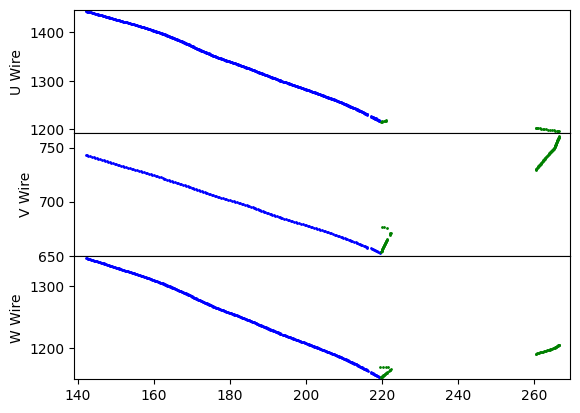

In [11]:
# Might be better just to plot them individually, could choose colour based on particle type

allDriftMin = 1e10
allDriftMax = -1e10
allWireMinU = 1e10
allWireMaxU = -1e10
allWireMinV = 1e10
allWireMaxV = -1e10
allWireMinW = 1e10
allWireMaxW = -1e10

for particleIndex in range(0, len(branches)):
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])
    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])
    
    if len(branches['TruePDG'][particleIndex]) == 0 :
        continue
    
    if len(driftCoordsU) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsU.min())
        allDriftMax = max(allDriftMax, driftCoordsU.max())
        allWireMinU = min(allWireMinU, wireCoordsU.min())
        allWireMaxU = max(allWireMaxU, wireCoordsU.max())
    
    if len(driftCoordsV) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsV.min())
        allDriftMax = max(allDriftMax, driftCoordsV.max())
        allWireMinV = min(allWireMinV, wireCoordsV.min())
        allWireMaxV = max(allWireMaxV, wireCoordsV.max())

    if len(driftCoordsW) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsW.min())
        allDriftMax = max(allDriftMax, driftCoordsW.max())
        allWireMinW = min(allWireMinW, wireCoordsW.min())
        allWireMaxW = max(allWireMaxW, wireCoordsW.max())
    
# Now lets draw plots!
plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0})  
buffer = 3.0

                 
# ------------------------------
# Draw U
# ------------------------------

plt.subplot(3, 1, 1)

for particleIndex in range(0, len(branches)):
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) != 0:
        plt.scatter(driftCoordsU, wireCoordsU, s=1, c=PDGToColor(particlePDG[0]))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinU - buffer, allWireMaxU + buffer])
plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3, 1, 2)

# ------------------------------
# Draw V
# ------------------------------

for particleIndex in range(0, len(branches)):
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) != 0:
        plt.scatter(driftCoordsV, wireCoordsV, s=1, c=PDGToColor(particlePDG[0]))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinV- buffer, allWireMaxV + buffer])
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

# ------------------------------
# Draw W
# ------------------------------

plt.subplot(3, 1, 3)

for particleIndex in range(0, len(branches)):
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) != 0:
        plt.scatter(driftCoordsW, wireCoordsW, s=1, c=PDGToColor(particlePDG[0]))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinW - buffer, allWireMaxW + buffer])
plt.ylabel("W Wire")
    
plt.show()


PDG: 13


/var/folders/1g/qpfx8_ps0dn6405cqjp61k5r0000gn/T/ipykernel_34483/3559320302.py:71: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, count)
/var/folders/1g/qpfx8_ps0dn6405cqjp61k5r0000gn/T/ipykernel_34483/3559320302.py:147: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, count)
/var/folders/1g/qpfx8_ps0dn6405cqjp61k5r0000gn/T/ipykernel_34483/3559320302.py:225: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, count)


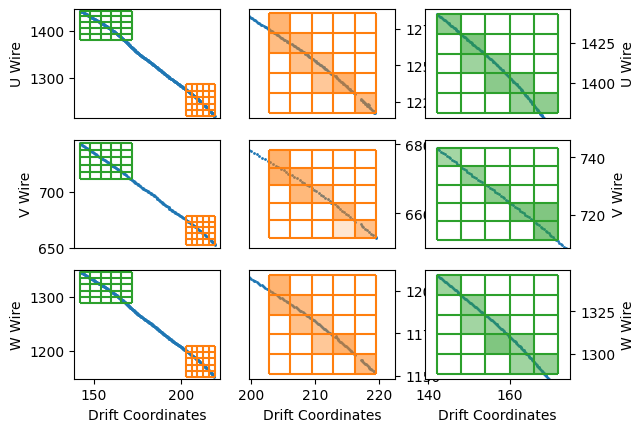

PDG: 2212


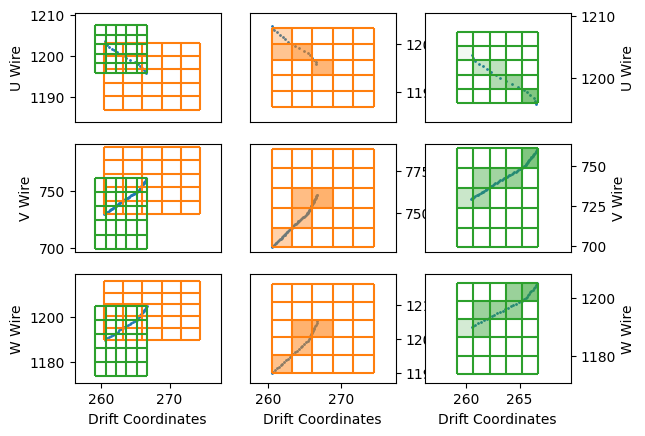

PDG: 2212


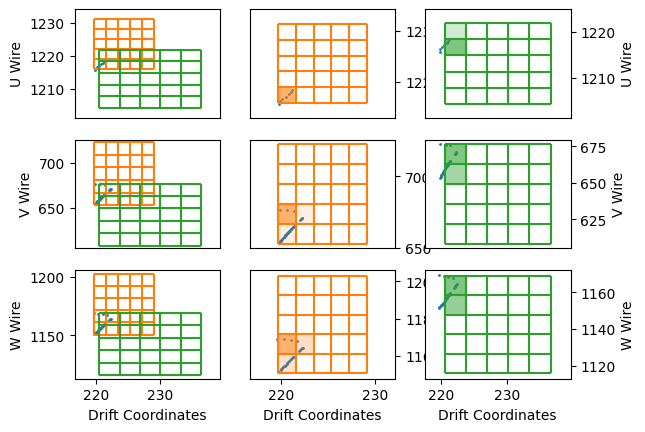

In [32]:
maxGridTransparency = 0.6

for particleIndex in range(len(branches)):
    
    # Get truth information
    particlePDG = branches['TruePDG'][particleIndex]
    
    if len(particlePDG) == 0 :
        continue
    
    # Get coordinates
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])

    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])

    # Get start grid boundaries
    startDriftBoundariesU = np.asarray(branches['StartDriftBoundariesU'][particleIndex])
    startDriftBoundariesV = np.asarray(branches['StartDriftBoundariesV'][particleIndex])
    startDriftBoundariesW = np.asarray(branches['StartDriftBoundariesW'][particleIndex])

    startWireBoundariesU = np.asarray(branches['StartWireBoundariesU'][particleIndex])
    startWireBoundariesV = np.asarray(branches['StartWireBoundariesV'][particleIndex])
    startWireBoundariesW = np.asarray(branches['StartWireBoundariesW'][particleIndex])
    
    # Get end grid boundaries
    endDriftBoundariesU = np.asarray(branches['EndDriftBoundariesU'][particleIndex])
    endDriftBoundariesV = np.asarray(branches['EndDriftBoundariesV'][particleIndex])
    endDriftBoundariesW = np.asarray(branches['EndDriftBoundariesW'][particleIndex])

    endWireBoundariesU = np.asarray(branches['EndWireBoundariesU'][particleIndex])
    endWireBoundariesV = np.asarray(branches['EndWireBoundariesV'][particleIndex])
    endWireBoundariesW = np.asarray(branches['EndWireBoundariesW'][particleIndex])
    
    # Get start grid!
    startGridU = branches['StartGridU'][particleIndex]
    startGridV = branches['StartGridV'][particleIndex]
    startGridW = branches['StartGridW'][particleIndex]
    
    # Get end grid!
    endGridU = branches['EndGridU'][particleIndex]
    endGridV = branches['EndGridV'][particleIndex]
    endGridW = branches['EndGridW'][particleIndex]
    
    if (len(driftCoordsU) == 0 or len(driftCoordsV) == 0 or len(driftCoordsW) == 0):
        continue
    
    # Now lets draw plots!
    plt.subplots(nrows = 3, ncols = 2, gridspec_kw = {'wspace': 10.0, 'hspace': 1})

    globalDriftMin = min(driftCoordsU.min(), driftCoordsV.min(), driftCoordsW.min(), startDriftBoundariesU.min(), endDriftBoundariesU.min())
    globalDriftMax = max(driftCoordsU.max(), driftCoordsV.max(), driftCoordsW.max(), startDriftBoundariesU.max(), endDriftBoundariesU.max())

    driftLimits = [[globalDriftMin - buffer, globalDriftMax + buffer], [startDriftBoundariesU.min() - buffer, startDriftBoundariesU.max() + buffer], [endDriftBoundariesU.min() - buffer, endDriftBoundariesU.max() + buffer]]
    wireLimitsU = [[min(wireCoordsU.min(), startWireBoundariesU.min(), endWireBoundariesU.min()) - buffer, max(wireCoordsU.max(), startWireBoundariesU.max(), endWireBoundariesU.max()) + buffer], [startWireBoundariesU.min() - buffer, startWireBoundariesU.max() + buffer], [endWireBoundariesU.min() - buffer, endWireBoundariesU.max() + buffer]]
    wireLimitsV = [[min(wireCoordsV.min(), startWireBoundariesV.min(), endWireBoundariesV.min()) - buffer, max(wireCoordsV.max(), startWireBoundariesV.max(), endWireBoundariesV.max()) + buffer], [startWireBoundariesV.min() - buffer, startWireBoundariesV.max() + buffer], [endWireBoundariesV.min() - buffer, endWireBoundariesV.max() + buffer]]
    wireLimitsW = [[min(wireCoordsW.min(), startWireBoundariesW.min(), endWireBoundariesW.min()) - buffer, max(wireCoordsW.max(), startWireBoundariesW.max(), endWireBoundariesW.max()) + buffer], [startWireBoundariesW.min() - buffer, startWireBoundariesW.max() + buffer], [endWireBoundariesW.min() - buffer, endWireBoundariesW.max() + buffer]]

    print('PDG: ' + str(particlePDG[0]))
    
    count = 1;

    # ------------------------------
    # Draw U
    # ------------------------------

    for i in range(3):
        plt.subplot(3, 3, count)
        plt.scatter(driftCoordsU, wireCoordsU, s=1)
    
        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsU[i])
        plt.ylabel("U Wire")
    
        if i == 1 or i == 2: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")
        
        plt.gca().axes.get_xaxis().set_visible(False)

        # Draw start grid
        if i == 0 or i == 1:
            for boundary in startDriftBoundariesU:
                plt.vlines(boundary, startWireBoundariesU.min(), startWireBoundariesU.max(), color='tab:orange')

            for boundary in startWireBoundariesU:
                plt.hlines(boundary, startDriftBoundariesU.min(), startDriftBoundariesU.max(), color='tab:orange')
            
            # Fill start grid, with relative shading
            if i == 1:
                maxWeightU = -1e10

                for driftIndex in range(len(startDriftBoundariesU) - 1):
                    for wireIndex in range(len(startWireBoundariesU) - 1):

                        gridEntry = startGridU[driftIndex][wireIndex]

                        if gridEntry > maxWeightU:
                            maxWeightU = gridEntry

                for driftIndex in range(len(startDriftBoundariesU) - 1):
                    for wireIndex in range(len(startWireBoundariesU) - 1):

                        gridEntry = startGridU[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([startDriftBoundariesU[driftIndex], startDriftBoundariesU[driftIndex + 1], startDriftBoundariesU[driftIndex + 1], startDriftBoundariesU[driftIndex]], [startWireBoundariesU[wireIndex], startWireBoundariesU[wireIndex], startWireBoundariesU[wireIndex + 1], startWireBoundariesU[wireIndex + 1]], "tab:orange", alpha=(gridEntry * maxGridTransparency / maxWeightU))

        # Draw end grid
        if i == 0 or i == 2:
            for boundary in endDriftBoundariesU:
                plt.vlines(boundary, endWireBoundariesU.min(), endWireBoundariesU.max(), color='tab:green')

            for boundary in endWireBoundariesU:
                plt.hlines(boundary, endDriftBoundariesU.min(), endDriftBoundariesU.max(), color='tab:green')
            
            # Fill end grid, with relative shading
            if i == 2:
                maxWeightU = -1e10

                for driftIndex in range(len(endDriftBoundariesU) - 1):
                    for wireIndex in range(len(endWireBoundariesU) - 1):

                        gridEntry = endGridU[driftIndex][wireIndex]

                        if gridEntry > maxWeightU:
                            maxWeightU = gridEntry

                for driftIndex in range(len(endDriftBoundariesU) - 1):
                    for wireIndex in range(len(endWireBoundariesU) - 1):

                        gridEntry = endGridU[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([endDriftBoundariesU[driftIndex], endDriftBoundariesU[driftIndex + 1], endDriftBoundariesU[driftIndex + 1], endDriftBoundariesU[driftIndex]], [endWireBoundariesU[wireIndex], endWireBoundariesU[wireIndex], endWireBoundariesU[wireIndex + 1], endWireBoundariesU[wireIndex + 1]], "tab:green", alpha=(gridEntry * maxGridTransparency / maxWeightU))  
                            
        count += 1

    # ------------------------------
    # Draw V
    # ------------------------------

    for i in range(3):
        plt.subplot(3, 3, count)
        plt.scatter(driftCoordsV, wireCoordsV, s=1)
    
        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsV[i])
        plt.ylabel("V Wire")
    
        if i == 1 or i == 2: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")
        
        plt.gca().axes.get_xaxis().set_visible(False)

        # Draw start grid
        if i == 0 or i == 1:
            for boundary in startDriftBoundariesV:
                plt.vlines(boundary, startWireBoundariesV.min(), startWireBoundariesV.max(), color='tab:orange')

            for boundary in startWireBoundariesV:
                plt.hlines(boundary, startDriftBoundariesV.min(), startDriftBoundariesV.max(), color='tab:orange')
            
            # Fill start grid, with relative shading
            if i == 1:
                maxWeightV = -1e10

                for driftIndex in range(len(startDriftBoundariesV) - 1):
                    for wireIndex in range(len(startWireBoundariesV) - 1):

                        gridEntry = startGridV[driftIndex][wireIndex]

                        if gridEntry > maxWeightV:
                            maxWeightV = gridEntry

                for driftIndex in range(len(startDriftBoundariesV) - 1):
                    for wireIndex in range(len(startWireBoundariesV) - 1):

                        gridEntry = startGridV[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([startDriftBoundariesV[driftIndex], startDriftBoundariesV[driftIndex + 1], startDriftBoundariesV[driftIndex + 1], startDriftBoundariesV[driftIndex]], [startWireBoundariesV[wireIndex], startWireBoundariesV[wireIndex], startWireBoundariesV[wireIndex + 1], startWireBoundariesV[wireIndex + 1]], "tab:orange", alpha=(gridEntry * maxGridTransparency / maxWeightV))

        # Draw end grid
        if i == 0 or i == 2:
            for boundary in endDriftBoundariesV:
                plt.vlines(boundary, endWireBoundariesV.min(), endWireBoundariesV.max(), color='tab:green')

            for boundary in endWireBoundariesV:
                plt.hlines(boundary, endDriftBoundariesV.min(), endDriftBoundariesV.max(), color='tab:green')
            
            # Fill end grid, with relative shading
            if i == 2:
                maxWeightV = -1e10

                for driftIndex in range(len(endDriftBoundariesV) - 1):
                    for wireIndex in range(len(endWireBoundariesV) - 1):

                        gridEntry = endGridV[driftIndex][wireIndex]

                        if gridEntry > maxWeightV:
                            maxWeightV = gridEntry

                for driftIndex in range(len(endDriftBoundariesV) - 1):
                    for wireIndex in range(len(endWireBoundariesV) - 1):

                        gridEntry = endGridV[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([endDriftBoundariesV[driftIndex], endDriftBoundariesV[driftIndex + 1], endDriftBoundariesV[driftIndex + 1], endDriftBoundariesV[driftIndex]], [endWireBoundariesV[wireIndex], endWireBoundariesV[wireIndex], endWireBoundariesV[wireIndex + 1], endWireBoundariesV[wireIndex + 1]], "tab:green", alpha=(gridEntry * maxGridTransparency / maxWeightV))  
                            
        count += 1


    # ------------------------------
    # Draw W
    # ------------------------------


    for i in range(3):
        plt.subplot(3, 3, count)
        plt.scatter(driftCoordsW, wireCoordsW, s=1)
    
        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsW[i])
        plt.ylabel("W Wire")
        plt.xlabel("Drift Coordinates")
    
        if i == 1 or i == 2: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")

        # Draw start grid
        if i == 0 or i == 1:
            for boundary in startDriftBoundariesW:
                plt.vlines(boundary, startWireBoundariesW.min(), startWireBoundariesW.max(), color='tab:orange')

            for boundary in startWireBoundariesW:
                plt.hlines(boundary, startDriftBoundariesW.min(), startDriftBoundariesW.max(), color='tab:orange')
            
            # Fill start grid, with relative shading
            if i == 1:
                maxWeightW = -1e10

                for driftIndex in range(len(startDriftBoundariesW) - 1):
                    for wireIndex in range(len(startWireBoundariesW) - 1):

                        gridEntry = startGridW[driftIndex][wireIndex]

                        if gridEntry > maxWeightW:
                            maxWeightW = gridEntry

                for driftIndex in range(len(startDriftBoundariesW) - 1):
                    for wireIndex in range(len(startWireBoundariesW) - 1):

                        gridEntry = startGridW[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([startDriftBoundariesW[driftIndex], startDriftBoundariesW[driftIndex + 1], startDriftBoundariesW[driftIndex + 1], startDriftBoundariesW[driftIndex]], [startWireBoundariesW[wireIndex], startWireBoundariesW[wireIndex], startWireBoundariesW[wireIndex + 1], startWireBoundariesW[wireIndex + 1]], "tab:orange", alpha=(gridEntry * maxGridTransparency / maxWeightW))

        # Draw end grid
        if i == 0 or i == 2:
            for boundary in endDriftBoundariesW:
                plt.vlines(boundary, endWireBoundariesW.min(), endWireBoundariesW.max(), color='tab:green')

            for boundary in endWireBoundariesW:
                plt.hlines(boundary, endDriftBoundariesW.min(), endDriftBoundariesW.max(), color='tab:green')
            
            # Fill end grid, with relative shading
            if i == 2:
                maxWeightW = -1e10

                for driftIndex in range(len(endDriftBoundariesW) - 1):
                    for wireIndex in range(len(endWireBoundariesW) - 1):

                        gridEntry = endGridW[driftIndex][wireIndex]

                        if gridEntry > maxWeightW:
                            maxWeightW = gridEntry

                for driftIndex in range(len(endDriftBoundariesW) - 1):
                    for wireIndex in range(len(endWireBoundariesW) - 1):

                        gridEntry = endGridW[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([endDriftBoundariesW[driftIndex], endDriftBoundariesW[driftIndex + 1], endDriftBoundariesW[driftIndex + 1], endDriftBoundariesW[driftIndex]], [endWireBoundariesW[wireIndex], endWireBoundariesW[wireIndex], endWireBoundariesW[wireIndex + 1], endWireBoundariesW[wireIndex + 1]], "tab:green", alpha=(gridEntry * maxGridTransparency / maxWeightW))  
                            
        count += 1
     
    plt.show()